<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import pandas as pd

url = 'drive/My Drive/datasets/avocado.csv'
avocado_prices = pd.read_csv(url)

In [3]:
import numpy as np
np.shape(avocado_prices)

(18249, 14)

In [0]:
avocado = np.array(avocado_prices)

In [25]:
avocado_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [0]:
average_price = avocado[:,2:3]
avocado_numdata = avocado[:,3:11]
avocado_region = avocado[:,13:14]
avocado_volume = avocado[:,3:4]
avocado_4046 = avocado[:,4:5]
avocado_4225 = avocado[:,5:6]
avocado_4770 = avocado[:,6:7]

avocado_year = avocado[:,12:13]
avocado_type = avocado[:,11:12]

In [0]:
import matplotlib.pyplot as plt

plt.scatter(avocado_volume, average_price,marker='s',c='g')
plt.xlabel('Volume')
plt.ylabel('Price')

#범례 표시
plt.legend()
plt.grid(True)
plt.show()

In [0]:
def scatter_graph(x,y):
  plt.scatter(x,y,marker='s',c='b')
  plt.xlabel('X data')
  plt.ylabel('Y data')
  plt.legend()
  plt.grid(True)
  plt.show()

def linear_graph(x,y):
  plt.plot(x,y)
  plt.xlabel('X data')
  plt.ylabel('Y data')
  plt.legend()
  plt.grid(False)
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15b7da82b0>,
      dtype=object)

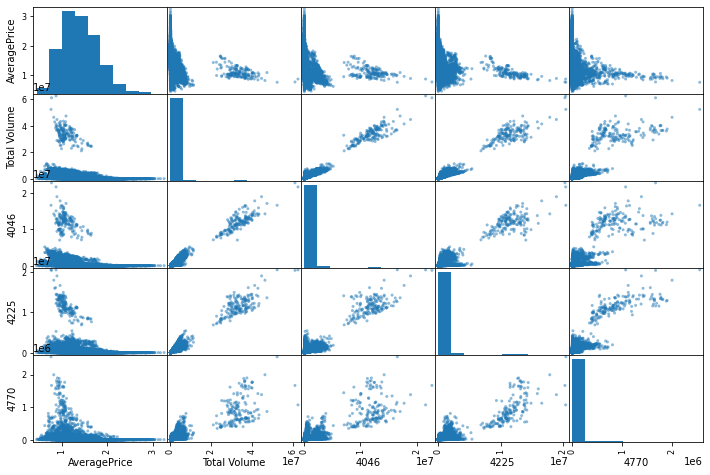

In [15]:
from pandas.plotting import scatter_matrix


attributes = ['AveragePrice','Total Volume','4046','4225','4770']
scatter_matrix(avocado_prices[attributes], figsize=(12,8))

No handles with labels found to put in legend.


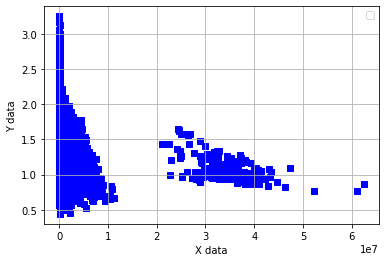

In [18]:
scatter_graph(avocado_prices['Total Volume'],avocado_prices['AveragePrice'])

In [0]:
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib


transform = MinMaxScaler()
#avocado_numdata_trans = transform.fit_transform(avocado_numdata)
#y_transform = transform.transform(average_price)


X_train,X_test,y_train,y_test = train_test_split(avocado_numdata_trans,average_price,test_size=0.2)






network = models.Sequential()
network.add(layers.Dense(30,activation='relu'))
network.add(layers.Dense(30,activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='rmsprop',
                loss='mean_squared_error',)               

network.fit(X_train,y_train,epochs=120,batch_size=128)

In [0]:
y_pred = network.predict(X_test).flatten()


real = []
pred = []
index = []
for i in range(50):
  index.append(i)
  real.append(y_test[i])
  pred.append(y_pred[i])
  print('real price:',y_test[i],'prediction:',y_pred[i])

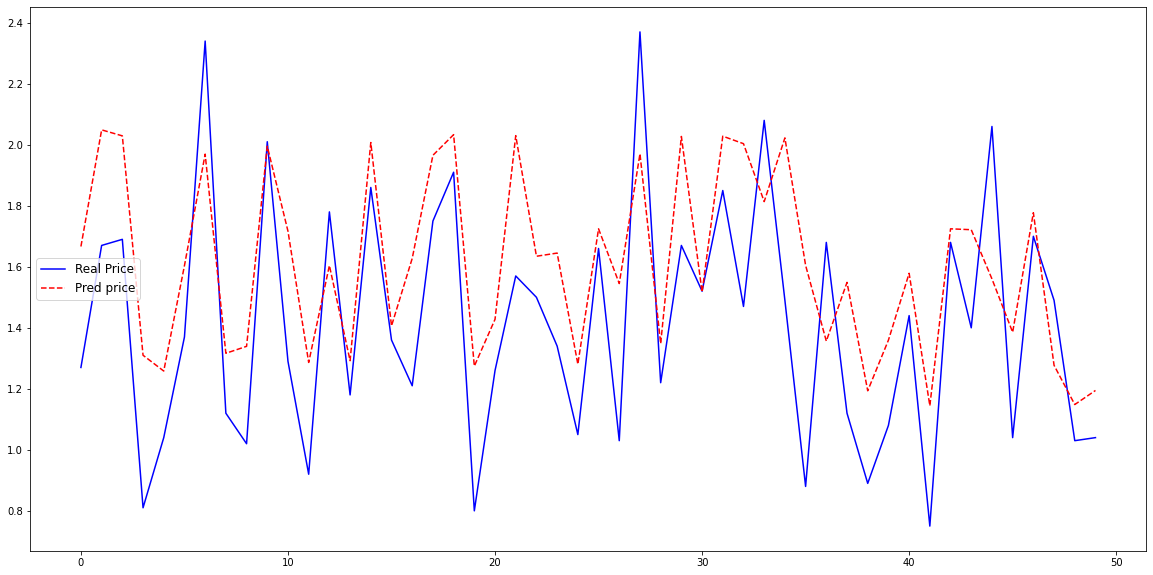

In [43]:
plt.figure(figsize=(20,10))
plt.plot(index,real,'b-',label='Real Price')
plt.plot(index,pred,'r--',label='Pred price')
plt.legend(loc='center left',fontsize=12)
plt.show()